In [1]:
import os 
os.chdir(r'Q:\sachuriga\Sachuriga_Python/quattrocolo-nwb4fp\src')

from neurochat.nc_data import NData
from neurochat.nc_spike import NSpike
from neurochat.nc_spatial import NSpatial
import neurochat.nc_plot as nc_plot
from neurochat.nc_lfp import NLfp
import matplotlib.pyplot as plt
import numpy as np
from pynwb import NWBHDF5IO
import matplotlib.pyplot as plt
import numpy as np
import math
import pynapple as nap
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize

import sys
import nwb4fp.analyses.maps as mapp
from nwb4fp.analyses.examples.tracking_plot import plot_ratemap,plot_path
from nwb4fp.analyses.fields import separate_fields_by_laplace, separate_fields_by_dilation,find_peaks,separate_fields_by_laplace_of_gaussian,calculate_field_centers,distance_to_edge_function, remove_fields_by_area, map_pass_to_unit_circle,which_field,compute_crossings
from elephant.statistics import time_histogram, instantaneous_rate
from nwb4fp.analyses import maps
from nwb4fp.analyses.data import pos2speed,speed_filtered_spikes,load_speed_fromNWB,load_units_fromNWB,get_filed_num,unit_location_ch
from scipy.ndimage import gaussian_filter
import ast
import pandas as pd
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd


Q:\sachuriga\Sachuriga_Python\quattrocolo-nwb4fp\src\nwb4fp\analyses\examples\tracking_plot.py:5: DeprecationWarning: Please import `center_of_mass` from the `scipy.ndimage` namespace; the `scipy.ndimage.measurements` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.measurements import center_of_mass


In [10]:
import pandas as pd
df_loaded = pd.read_pickle(r'Q:/sachuriga/CR_CA1_paper/tables/all_units_table.pkl')
len(df_loaded)
df_good = df_loaded[df_loaded['unit_quality']=="good"]
df_good = df_good[(df_good['cell_type_group_2_group']==0)|(df_good['cell_type_group_2_group']==1)]

In [11]:
df_good

spike_times unit_name   sd_ratio  \
0     [53.421866666666666, 54.1465, 61.9342333333333...        41   1.665216   
1     [52.239733333333334, 52.245, 52.2489, 53.17986...        47   2.558734   
6     [49.5398, 49.547, 49.5604, 49.65533333333333, ...         8   1.036041   
8     [50.3438, 50.802933333333335, 51.4826, 52.1020...        14   5.749932   
9     [49.632933333333334, 49.71693333333333, 49.915...        15   1.087160   
10    [50.3486, 54.10816666666667, 54.11566666666667...        16   7.262043   
15    [51.02993333333333, 51.05543333333333, 56.0588...        21   1.251824   
16    [49.89, 50.074666666666666, 50.34336666666667,...        22   2.228022   
20    [49.524566666666665, 50.489733333333334, 50.57...        31   1.324470   
21    [56.047333333333334, 65.78253333333333, 70.588...        32   1.255092   
23    [51.956, 55.55363333333333, 58.28136666666666,...        34   1.375887   
27    [69.04153333333333, 69.41343333333333, 69.419,...        40   1.917083   
29    [52.854366666666664, 53.04463333333333, 55.477...        43   1.257201   
31    [50.445566666666664, 51.053666666666665, 54.41...        46   1.820933   
32    [56.434133333333335, 64.35166666666667, 64.498...        49   1.211019   
33    [49.766733333333335, 49.986133333333335, 50.16...        50   1.230000   
34    [61.571866666666665, 75.75483333333334, 84.291...        54   2.158403   
35    [50.90463333333334, 50.9103, 50.91883333333333...        55   1.671485   
36    [73.49753333333334, 77.07366666666667, 77.0778...        56   2.790718   
37    [49.6793, 49.982733333333336, 59.4068, 59.9050...        57   1.099195   
38    [53.8643, 53.8726, 54.225033333333336, 54.2430...        58   1.326882   
39    [53.4344, 53.44533333333333, 81.99256666666666...        59   1.192254   
40    [49.797266666666665, 49.8036, 49.8072666666666...        64   1.134203   
41    [57.445566666666664, 61.043933333333335, 105.3...        65   2.047484   
42    [79.80586666666666, 82.36903333333333, 82.5270...         5   1.911421   
43    [355.5495666666667, 494.1717, 555.7439, 658.68...         6   2.804665   
44    [85.13216666666666, 85.2458, 85.54376666666667...        14   2.514760   
45    [64.58993333333333, 64.67256666666667, 64.6925...        17   1.383377   
46    [80.59643333333334, 80.6237, 80.6897, 80.7649,...        20   1.409312   
47    [67.74913333333333, 67.75976666666666, 67.7682...        25   1.292258   
48    [137.47613333333334, 137.48726666666667, 137.5...        26   1.598365   
50    [119.7886, 119.7949, 119.79836666666667, 119.8...        28   1.921309   
51    [65.16173333333333, 65.6292, 65.65236666666667...        38   1.618919   
52    [64.39616666666667, 64.45976666666667, 65.0193...        42   1.380173   
53    [67.0806, 69.38883333333334, 69.96626666666667...        44   1.446829   
54    [94.18466666666667, 115.74523333333333, 118.96...        45   2.327015   
55    [67.61136666666667, 69.1128, 69.36873333333334...        48   1.723918   
56    [82.09543333333333, 136.72986666666668, 136.74...        54   1.646448   
61    [64.0338, 64.04926666666667, 64.14776666666667...         8   1.030076   
62    [76.90883333333333, 84.95836666666666, 88.5522...         9   1.285850   
63    [69.25403333333334, 69.27493333333334, 69.4856...        13   1.368713   
65    [64.37293333333334, 64.4798, 64.49963333333334...        19   1.166965   
67    [64.60126666666666, 65.1374, 65.16613333333333...        24   1.030273   
69    [64.0808, 64.29566666666666, 64.30173333333333...        31   1.953615   
70    [85.21646666666666, 85.23886666666667, 85.2586...        32   1.887424   
71    [66.1892, 66.7591, 66.7661, 66.7791, 66.8539, ...        40   1.081586   
72    [84.32256666666666, 89.024, 91.43116666666667,...        41   1.628368   
75    [64.0739, 64.34473333333334, 64.3565, 64.38816...        51   1.505461   
76    [71.73523333333333, 72.09286666666667, 73.9213...        52   1.355748   
78    [32.0819, 32.121066666666664, 32.14263

In [12]:
metrics = ['half_width', 'recovery_slope', 'repolarization_slope', 
        'firing_range', 'peak_trough_ratio', 'peak_to_valley','matlab_acg_tau_rise','cell_type_group_2_group']
cls =  ['half_width', 'recovery_slope', 'repolarization_slope', 
        'firing_range', 'peak_trough_ratio', 'peak_to_valley','matlab_acg_tau_rise','cell_type_group_2_group']
df_good = df_good[metrics].dropna()

In [13]:
import pandas as pd
import numpy as np



# Function to remove outliers using IQR method
def remove_outliers(df, columns, factor=1.5):
    df_clean = df.copy()
    for col in columns:
        if df[col].dtype in [np.float64, np.int64]:  # Only process numeric columns
            Q1 = df[col].quantile(0.25)  # First quartile
            Q3 = df[col].quantile(0.75)  # Third quartile
            IQR = Q3 - Q1  # Interquartile range
            lower_bound = Q1 - factor * IQR
            upper_bound = Q3 + factor * IQR
            # Filter out rows where the value is outside the bounds
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Assuming df_good is your original DataFrame
# Remove outliers from numeric columns in metrics
numeric_metrics = [col for col in metrics if df_good[col].dtype in [np.float64, np.int64]]
df_no_outliers = remove_outliers(df_good, numeric_metrics)

# Select only the specified columns and drop any remaining NaN values
df_lda = df_no_outliers[metrics].dropna()

# Optional: Check the shape of the resulting DataFrame
print(f"Original shape: {df_good.shape}")
print(f"Shape after removing outliers and NaN: {df_lda.shape}")

Original shape: (1138, 8)
Shape after removing outliers and NaN: (857, 8)


In [14]:
df_lda 

half_width  recovery_slope  repolarization_slope  firing_range  \
0       0.000103  -208751.824563          1.418055e+06          1.58   
6       0.000167   -56801.713285          1.188074e+06         17.00   
8       0.000147  -129463.068263          1.452573e+06          5.98   
10      0.000253  -114170.036023          1.105141e+06          3.80   
16      0.000123   -99180.494619          1.393311e+06         12.58   
23      0.000133   -98258.753371          7.993655e+05          1.80   
27      0.000110  -230661.448456          1.482886e+06          1.20   
31      0.000107  -192171.610684          1.771888e+06          4.20   
32      0.000190   -53824.647225          6.411457e+05          5.58   
33      0.000140   -82688.620305          7.434379e+05          5.00   
34      0.000193   -77063.483080          4.264395e+05          5.20   
35      0.000127  -154762.839388          1.229776e+06          7.00   
37      0.000193  -135012.562402          1.030825e+06          2.80   
38      0.000103  -151900.470747          5.186047e+05          9.76   
39      0.000113  -110412.581312          7.260929e+05          4.60   
41      0.000133  -156831.938611          1.777892e+06          2.60   
44      0.000143  -130640.317634          1.347201e+06          2.20   
46      0.000150  -114143.425971          9.397660e+05          5.04   
47      0.000173  -140717.915608          1.097191e+06          1.60   
48      0.000213   -79880.002512          8.981189e+05          1.62   
50      0.000127  -106073.755624          2.039317e+06          2.64   
51      0.000150  -102996.551247          1.213249e+06          4.04   
52      0.000107  -108849.737916          8.872785e+05          7.42   
53      0.000120  -121091.336291          5.244555e+05          7.24   
55      0.000103  -141799.207406          1.972819e+06          1.60   
56      0.000127   -78118.659925          9.969519e+05          2.22   
62      0.000173  -108480.483263          6.076005e+05          6.02   
63      0.000140  -102456.294835          8.785729e+05          9.04   
65      0.000193   -64344.172966          6.149178e+05         10.82   
67      0.000123   -60810.170588          4.635472e+05          5.62   
69      0.000147  -143401.404331          1.707362e+06          3.50   
71      0.000220   -56566.036972          5.263078e+05         14.22   
72      0.000203  -100647.743482          8.182323e+05          4.80   
75      0.000150   -90479.573580          6.074536e+05         12.04   
78      0.000147  -105850.079169          1.196745e+06          1.60   
79      0.000157  -115689.048742          9.021327e+05          1.40   
83      0.000233   -74902.154468          6.130330e+05          7.20   
88      0.000197  -113888.651190          8.241141e+05          8.40   
90      0.000190   -85579.471283          6.614030e+05          7.55   
92      0.000140   -69255.248936          1.793728e+06          8.00   
94      0.000147  -146130.988026          1.681300e+06          2.95   
96      0.000117  -128504.562495          1.667381e+06          3.20   
99      0.000117  -180973.826820          1.852481e+06          0.60   
100     0.000147  -131663.205736          1.024204e+06          2.52   
101     0.000193  -124434.551613          8.390946e+05          1.32   
105     0.000160  -100872.901115          7.717687e+05          8.52   
110     0.000153  -109646.410179          1.281116e+06          9.72   
117     0.000150   -59283.605287          1.392050e+06         10.92   
118     0.000133  -108908.078762          1.172436e+06         13.56   
121     0.000190   -73780.164757          7.433793e+05          4.64   
123     0.000130  -105713.434233          9.200667e+05          0.80   
126     0.000223   -88146.884592          8.108522e+05          7.80   
134     0.000147  -120239.817966          1.186630e+06          6.99   
135     0.000200  -104595.161479          1.155128e+06          4.57   
136     0.000203   -98392.220906          7.73

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
dataset=df_lda
# Divide the data set into features (X) and target variable (y)
X = dataset.iloc[:, 0:7].values
y = dataset.iloc[:, 7].values

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

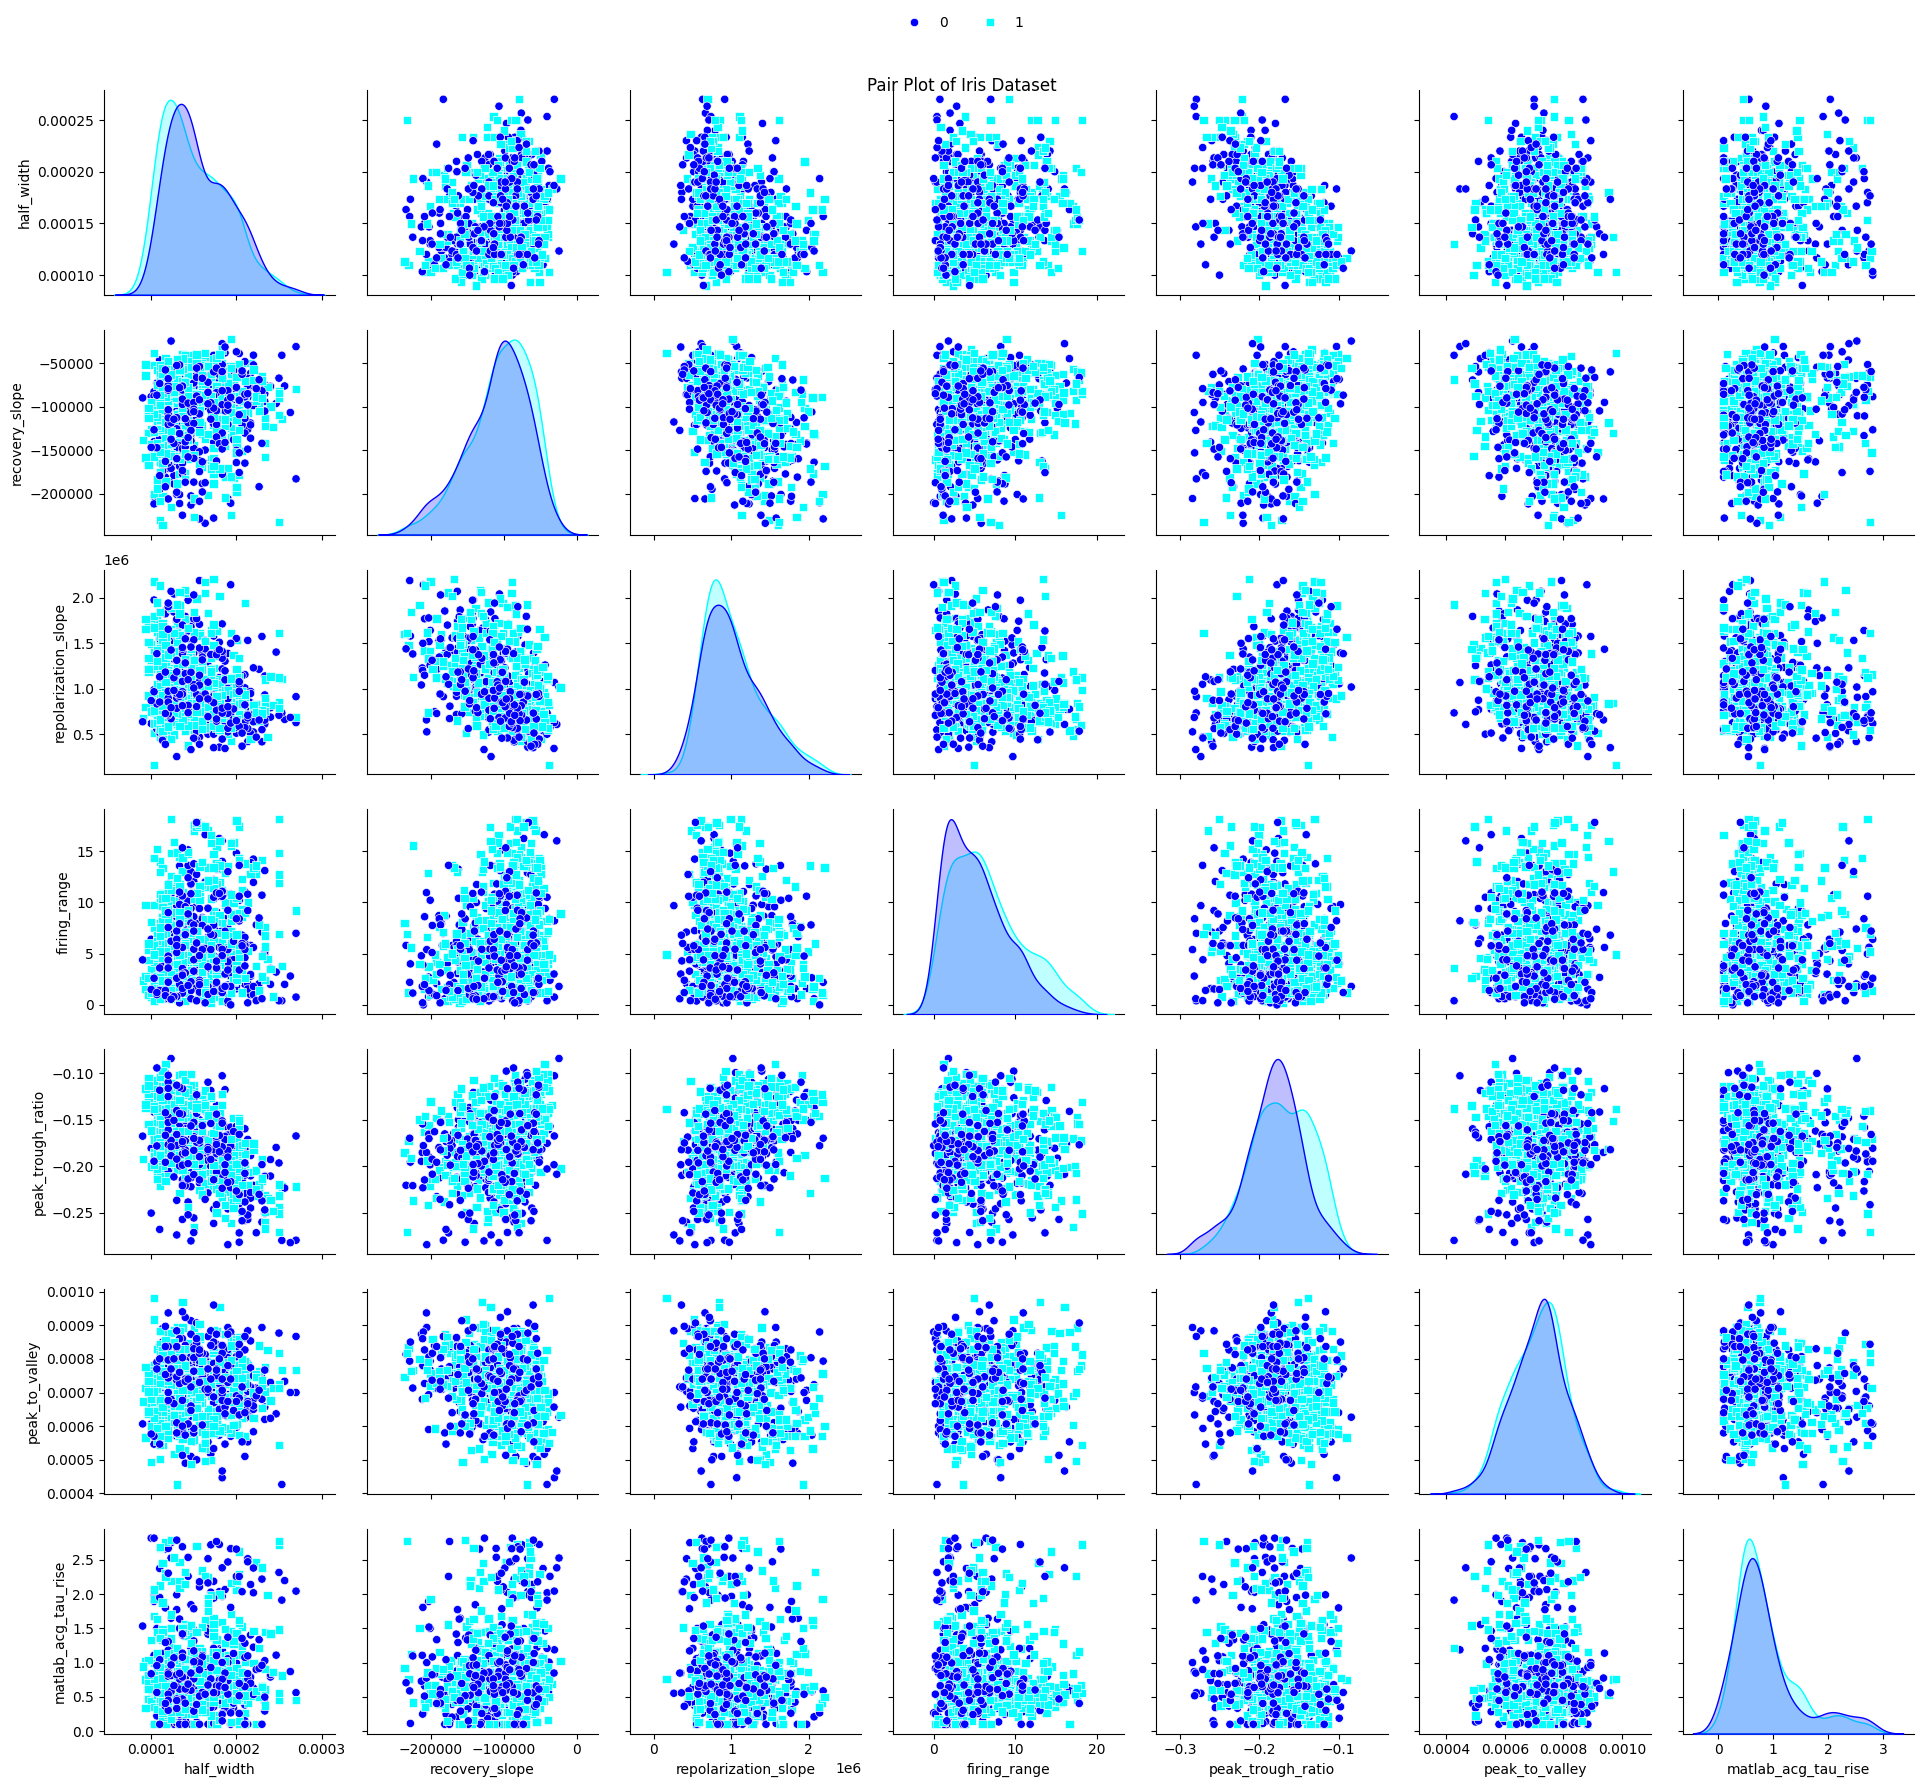

In [18]:
# Create a pair plot to visualize relationships between different features and species.
ax = sns.pairplot(dataset, hue='cell_type_group_2_group', markers=["o", "s"], palette=["blue", "cyan"],hue_order=[0,1])
plt.suptitle("Pair Plot of Iris Dataset")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.tight_layout()
plt.show()

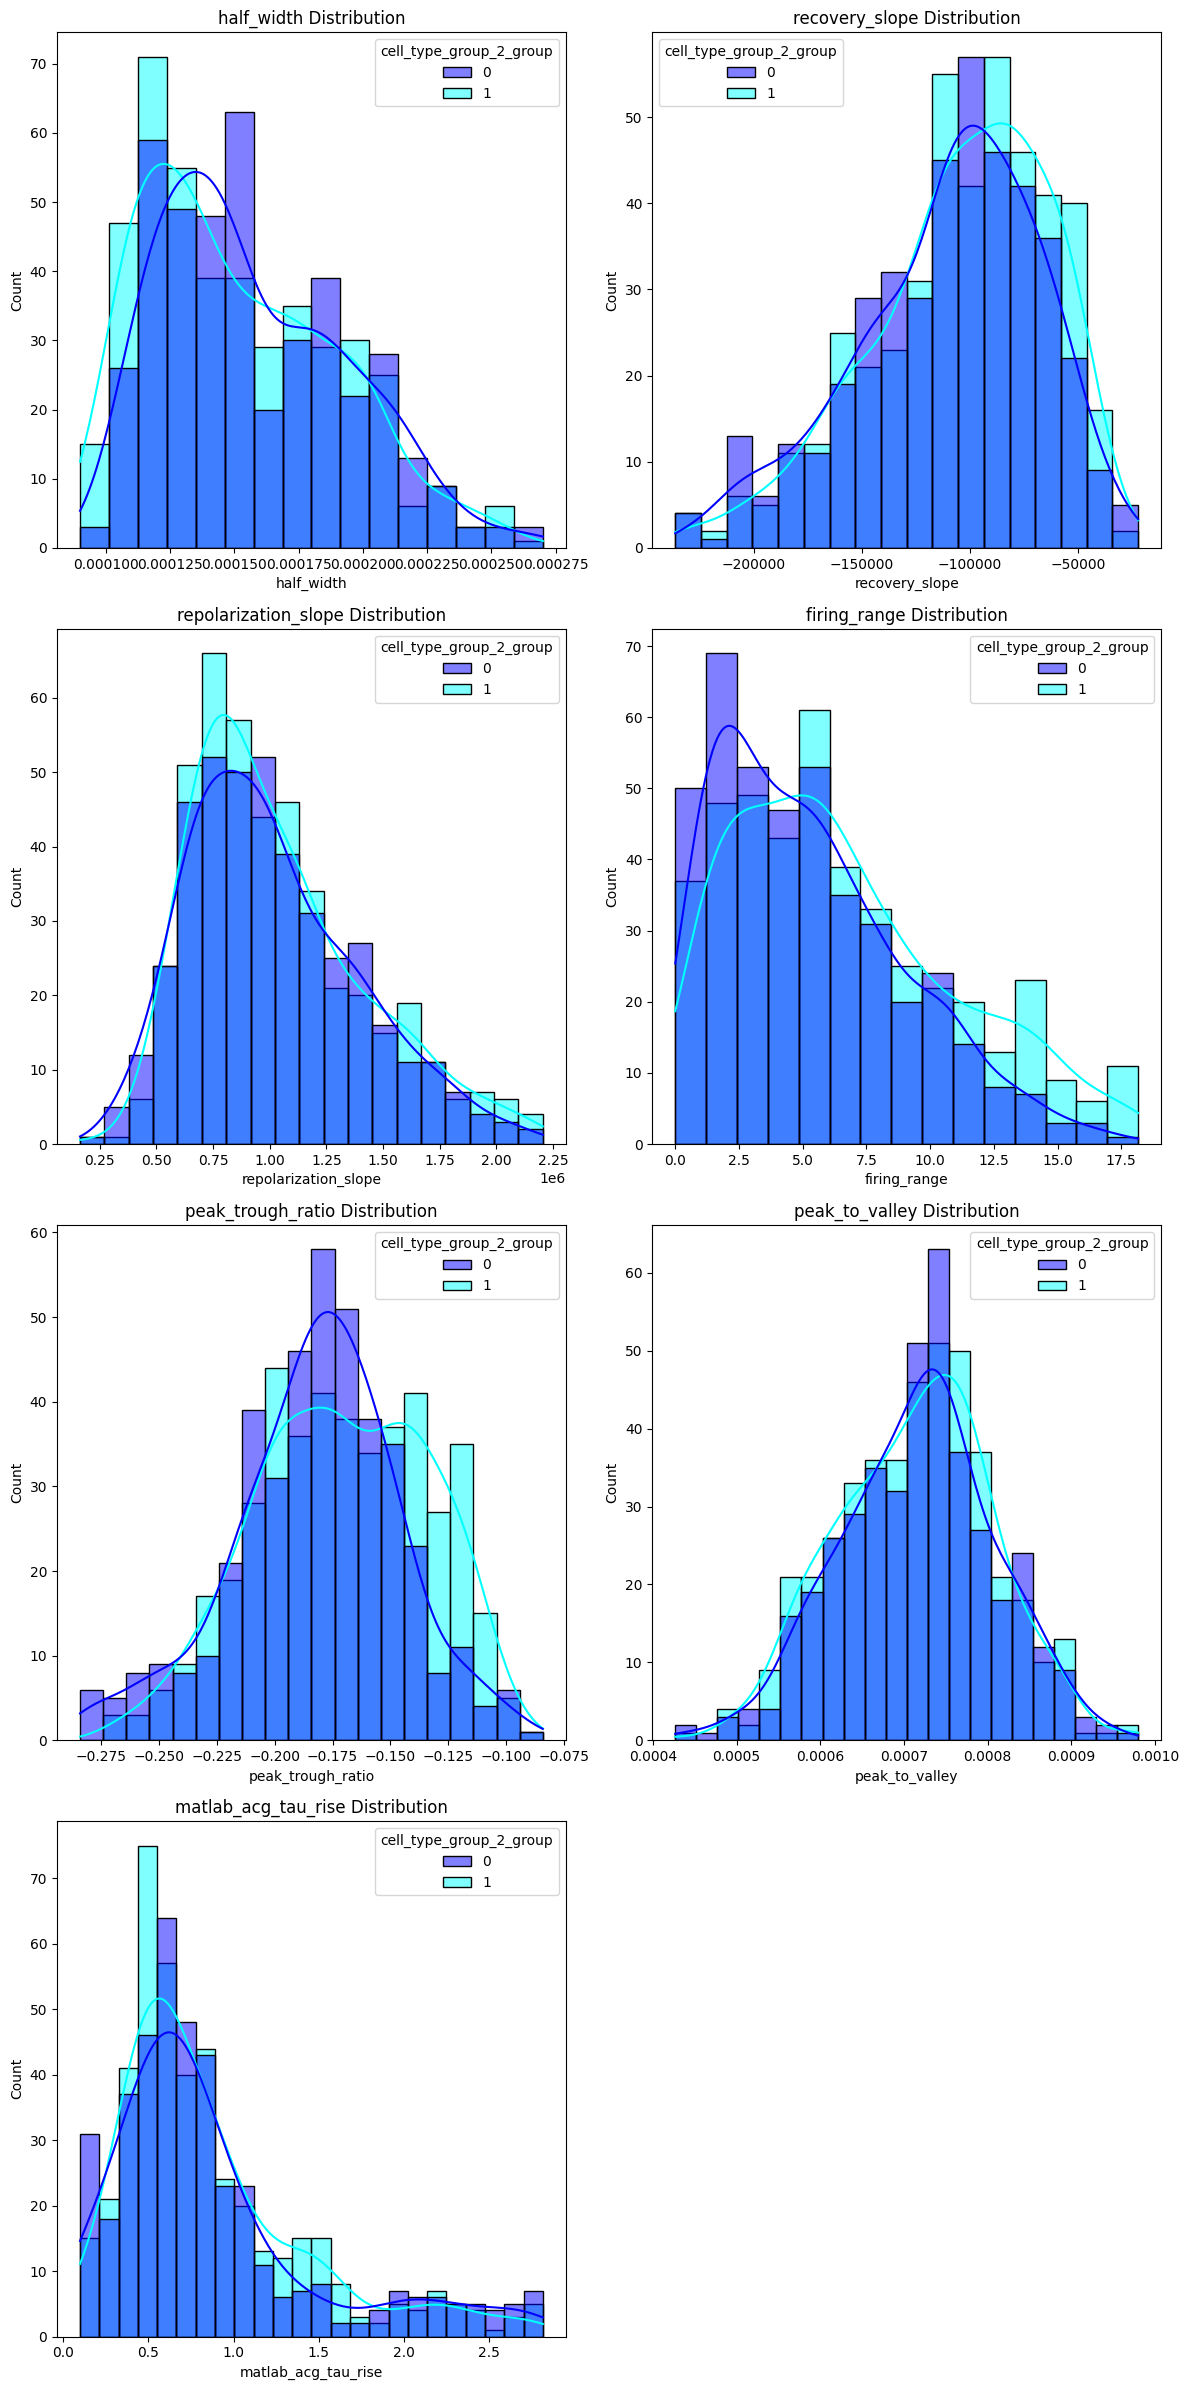

In [29]:
# Define custom colors for the 4 groups (you can adjust these hex codes as needed)
colors =["blue","cyan"] # Blue, Orange, Green, Red

plt.figure(figsize=(12, 24))
for i, feature in enumerate(cls[:-1]):
    plt.subplot(4, 2, i + 1)
    sns.histplot(
        data=dataset, 
        x=feature, 
        hue='cell_type_group_2_group',
        hue_order=[0,  1],  # Your specified hue order
        palette=colors,         # Applying the custom colors
        kde=True
    )
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

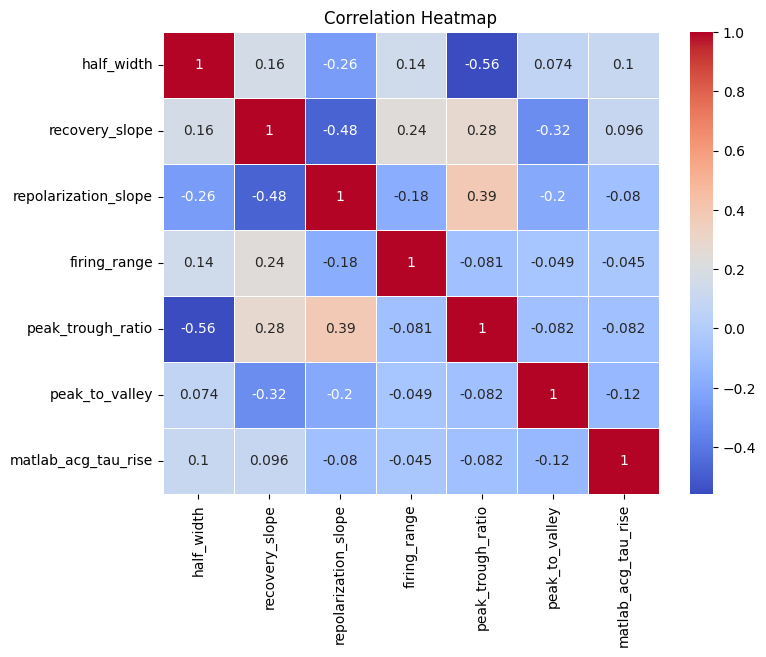

In [30]:
correlation_matrix = dataset.corr(numeric_only = True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [31]:
# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

In [26]:
tmp_Df = pd.DataFrame(X_train, columns=['LDA Component 1','LDA Component 2'])
tmp_Df['cell_type_group_2_group']=y_train
colors =["blue","cyan"] 
sns.FacetGrid(tmp_Df, hue ='cell_type_group_2_group',
              height = 6, hue_order=[0,  1],palette=colors).map(plt.scatter,
                              'LDA Component 1',
                              'LDA Component 2')

plt.legend(loc='upper right')

ValueError: Shape of passed values is (685, 1), indices imply (685, 2)

In [27]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy: 0.60


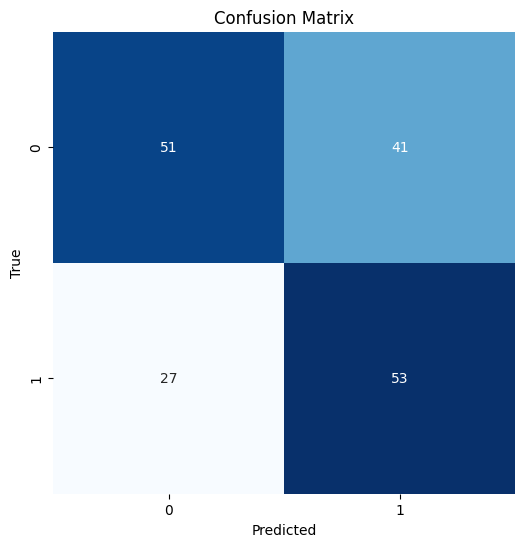

In [28]:
#Assume 'y_test' and 'y_pred' are already defined
accuracy = accuracy_score(y_test, y_pred)
conf_m = confusion_matrix(y_test, y_pred)

#Display the accuracy
print(f'Accuracy: {accuracy:.2f}')

#Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()